<a href="https://colab.research.google.com/github/NurFortuna/YOLOv8_Flower_Detection/blob/main/Train__YOLOv8_Object_Detection_on_a_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The New YOLOv8 API ##

The developers of YOLOv8 decided to break away from the standard YOLO project design : separate train.py, detect.py, val.py, and export.py scripts. In the short term it will probably cause some confusion while in the long term, it is a fantastic decision!

This pattern has been around since YOLOv3, and every YOLO iteration has replicated it. It was relatively simple to understand but notoriously challenging to deploy especially in real-time processing and tracking scenarios.

The new approach is much more flexible because it allows YOLOv8 to be used independently through the terminal, as well as being part of a complex computer vision application.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/cli.py", line 141, in entrypoint
    cli(cfg)
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/cli.py", line 80, in cli
    raise SyntaxError(f"yolo mode={mode} is invalid. Valid modes are: {', '.join(modes.keys())}\n{CLI_HELP_MSG}")
SyntaxError: yolo mode=checks is invalid. Valid modes are: train, val, predict, export

    YOLOv8 CLI Usage examples:

    1. Install the ultralytics package:

        pip install ultralytics

    2. Train, Val, Predict and Export using 'yolo' commands of the form:

            yolo TASK MODE ARGS

            Where   TASK (optional) is one of [detect, segment, classify]
                    MODE (required) is one of [train, val, predict, export]
                    ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
    

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Exporting dataset ##

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API KEY")
project = rf.workspace("my-datasets-0aq8j").project("flower-46h98")
dataset = project.version(2).download("yolov8")

/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a416175923f040035d96b9163f4608c1bf3948083566c4db604db7f8959fe9f3
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.14
    Uninstalling urllib3-1.26.14:
      Successfully uninstalled urllib3-1.26.14
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
  

Extracting Dataset Version Zip to Flower-2 in yolov8:: 100%|██████████| 3654/3654 [00:01<00:00, 3080.79it/s]


## Custom Training

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=400


/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Flower-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=400, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=Fa

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					     train_batch1201.jpg
confusion_matrix.png				     train_batch1202.jpg
events.out.tfevents.1674055118.905403b9d487.19395.0  train_batch1.jpg
F1_curve.png					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
predictions.json				     val_batch1_labels.jpg
R_curve.png					     val_batch1_pred.jpg
results.csv					     val_batch2_labels.jpg
results.png					     val_batch2_pred.jpg
train_batch0.jpg				     weights
train_batch1200.jpg


/content


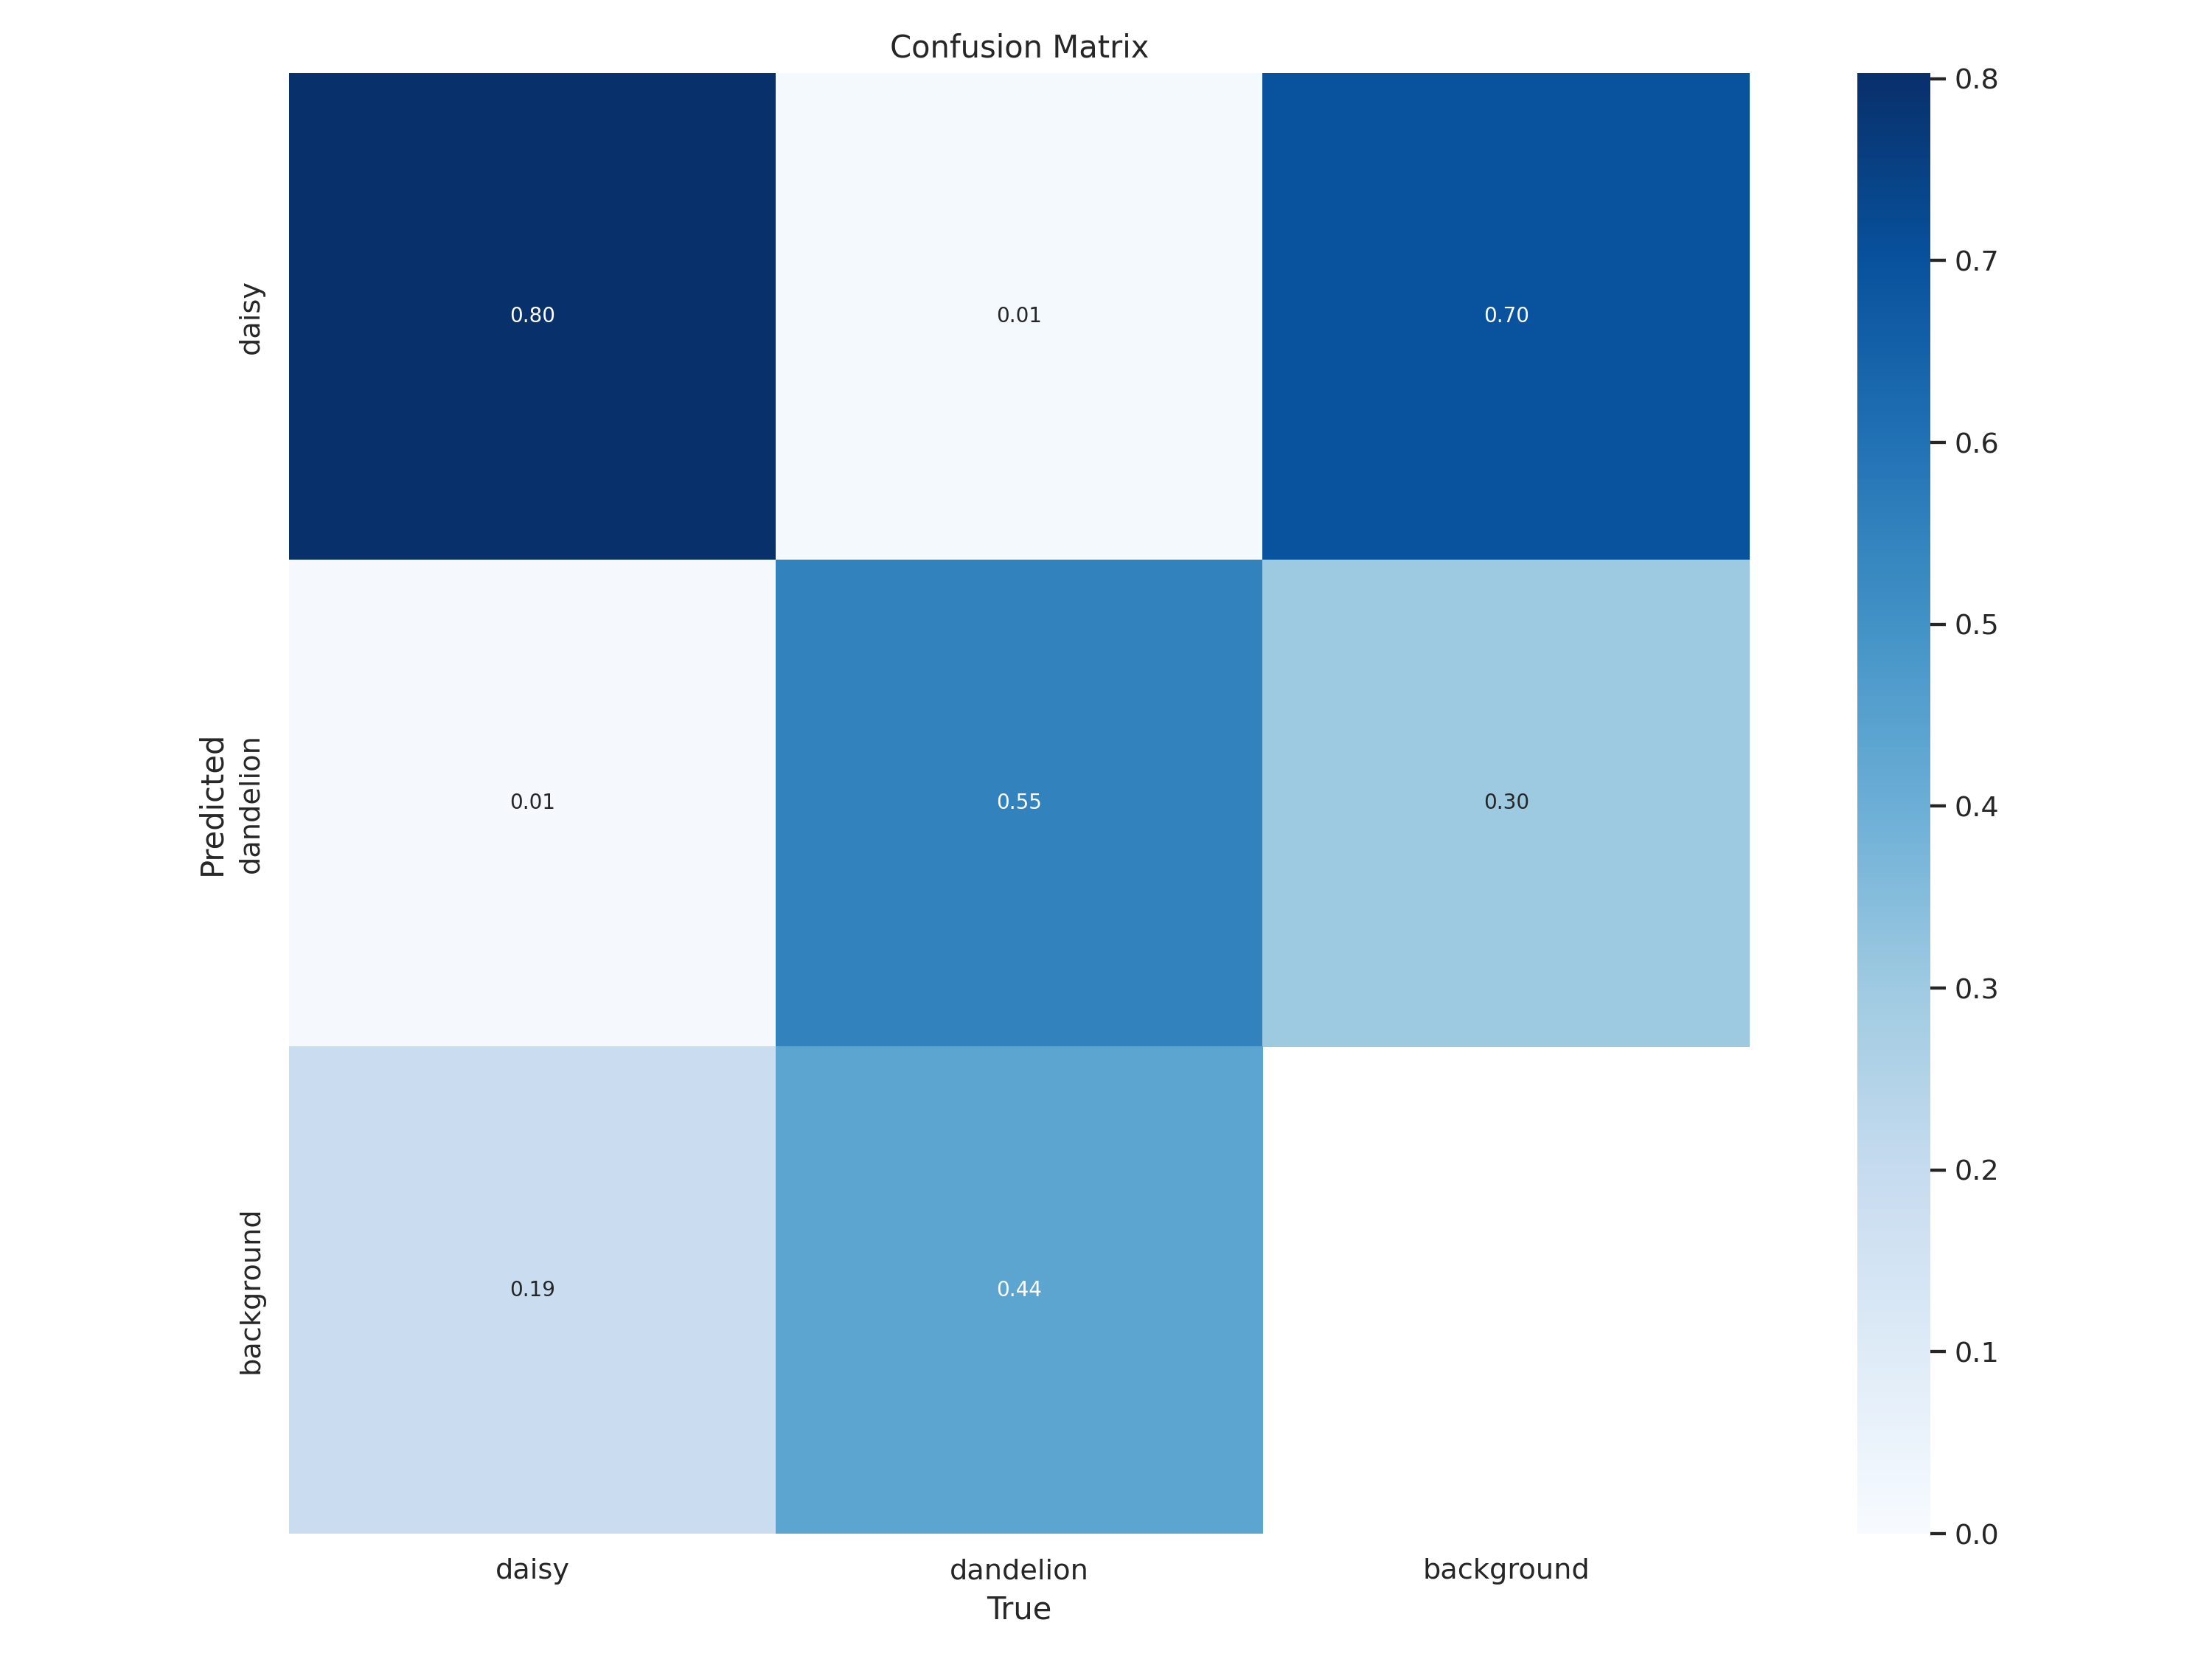

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


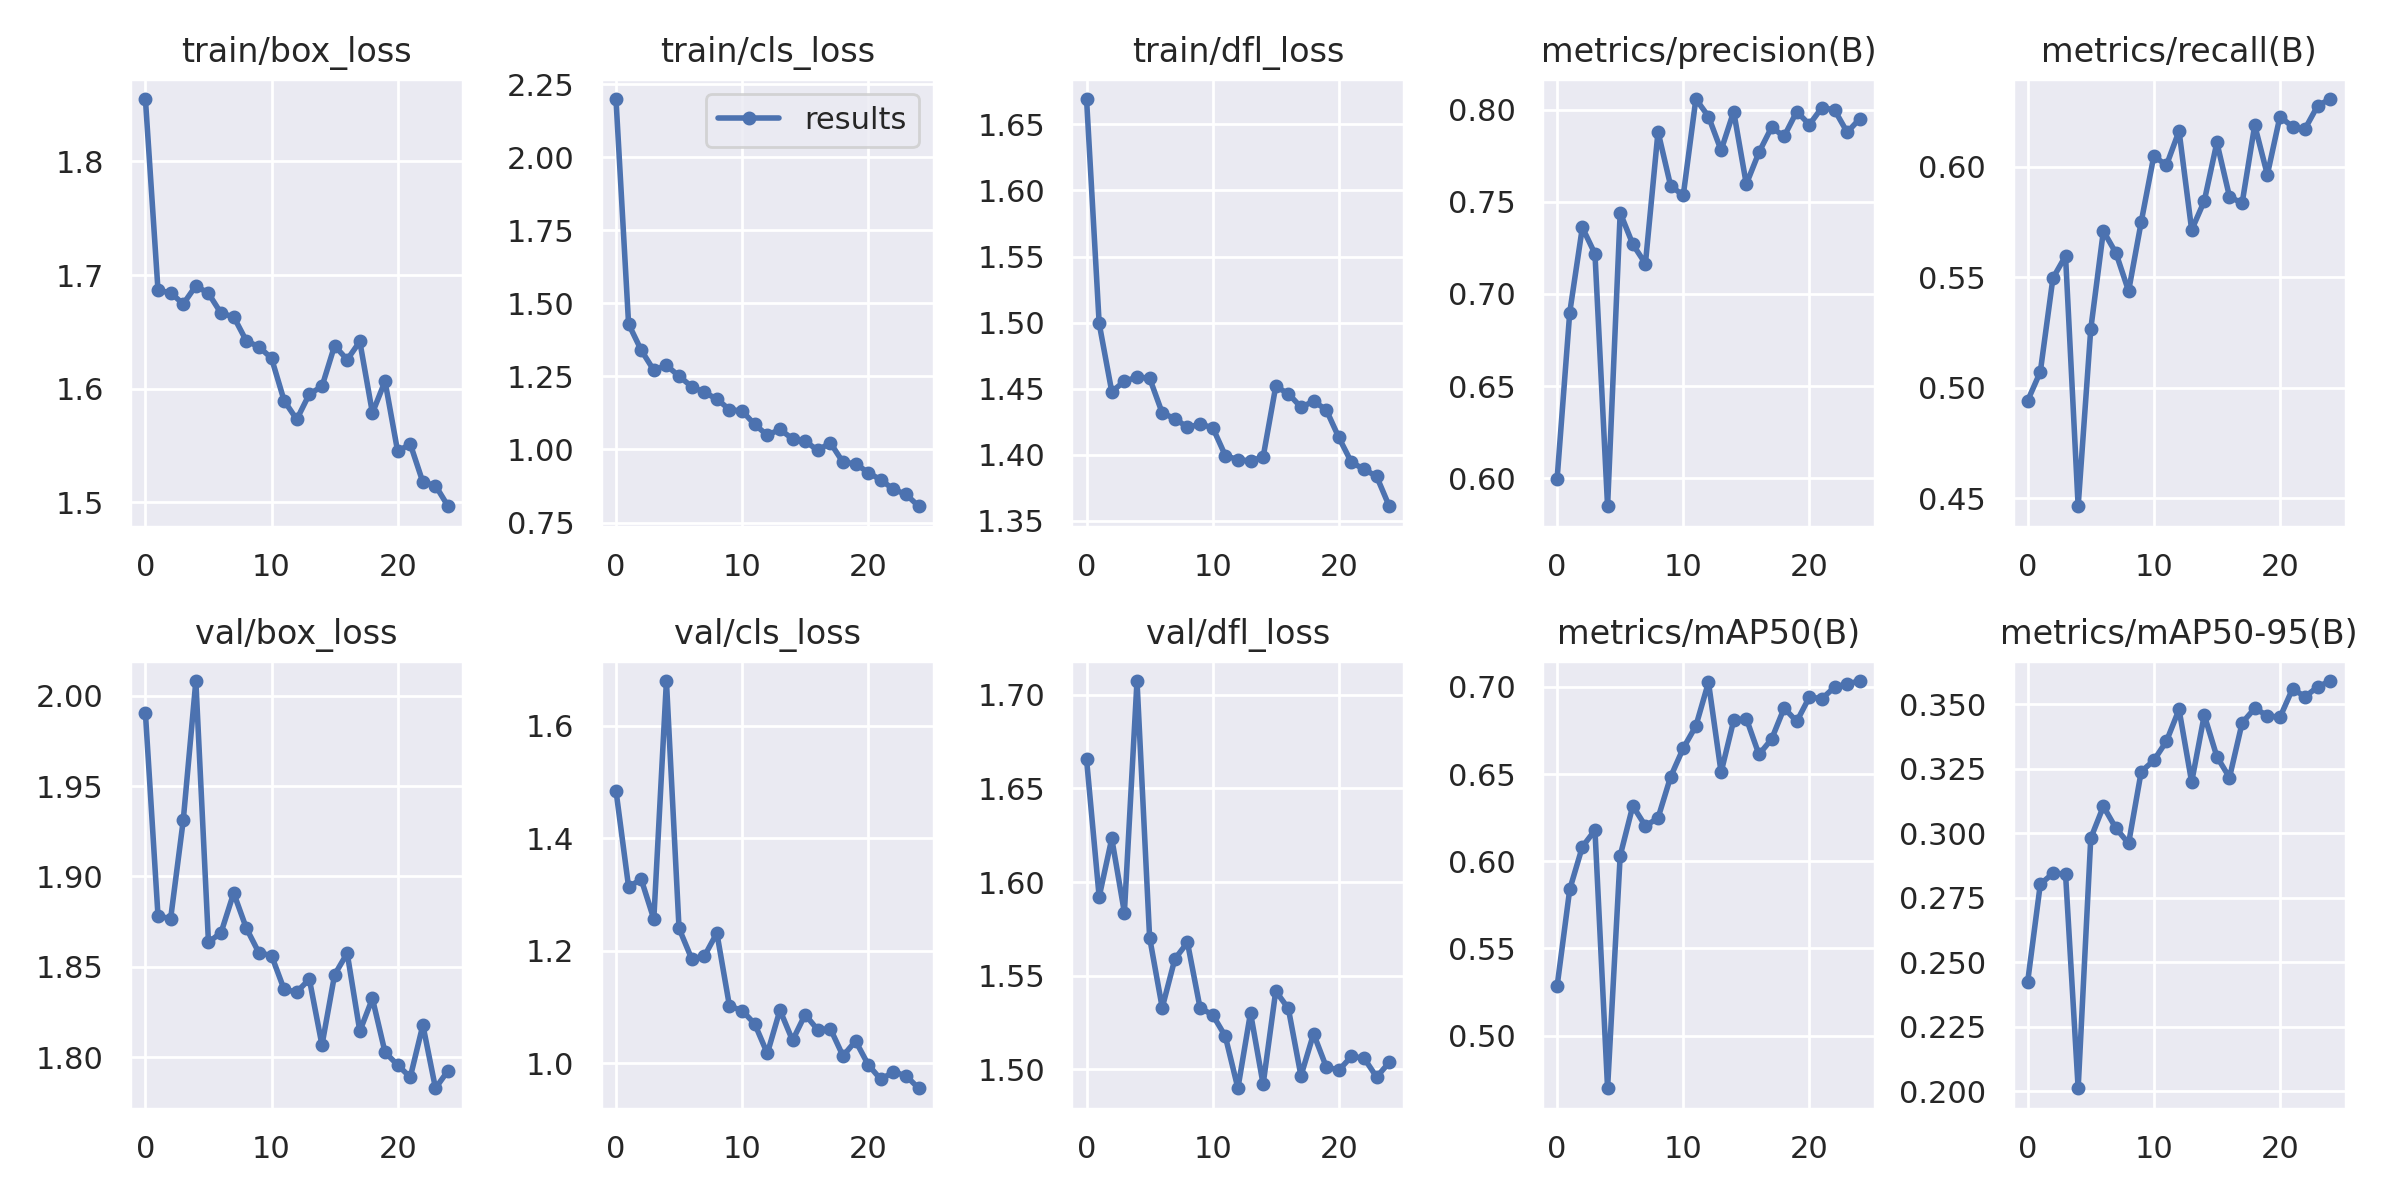

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=950)

/content


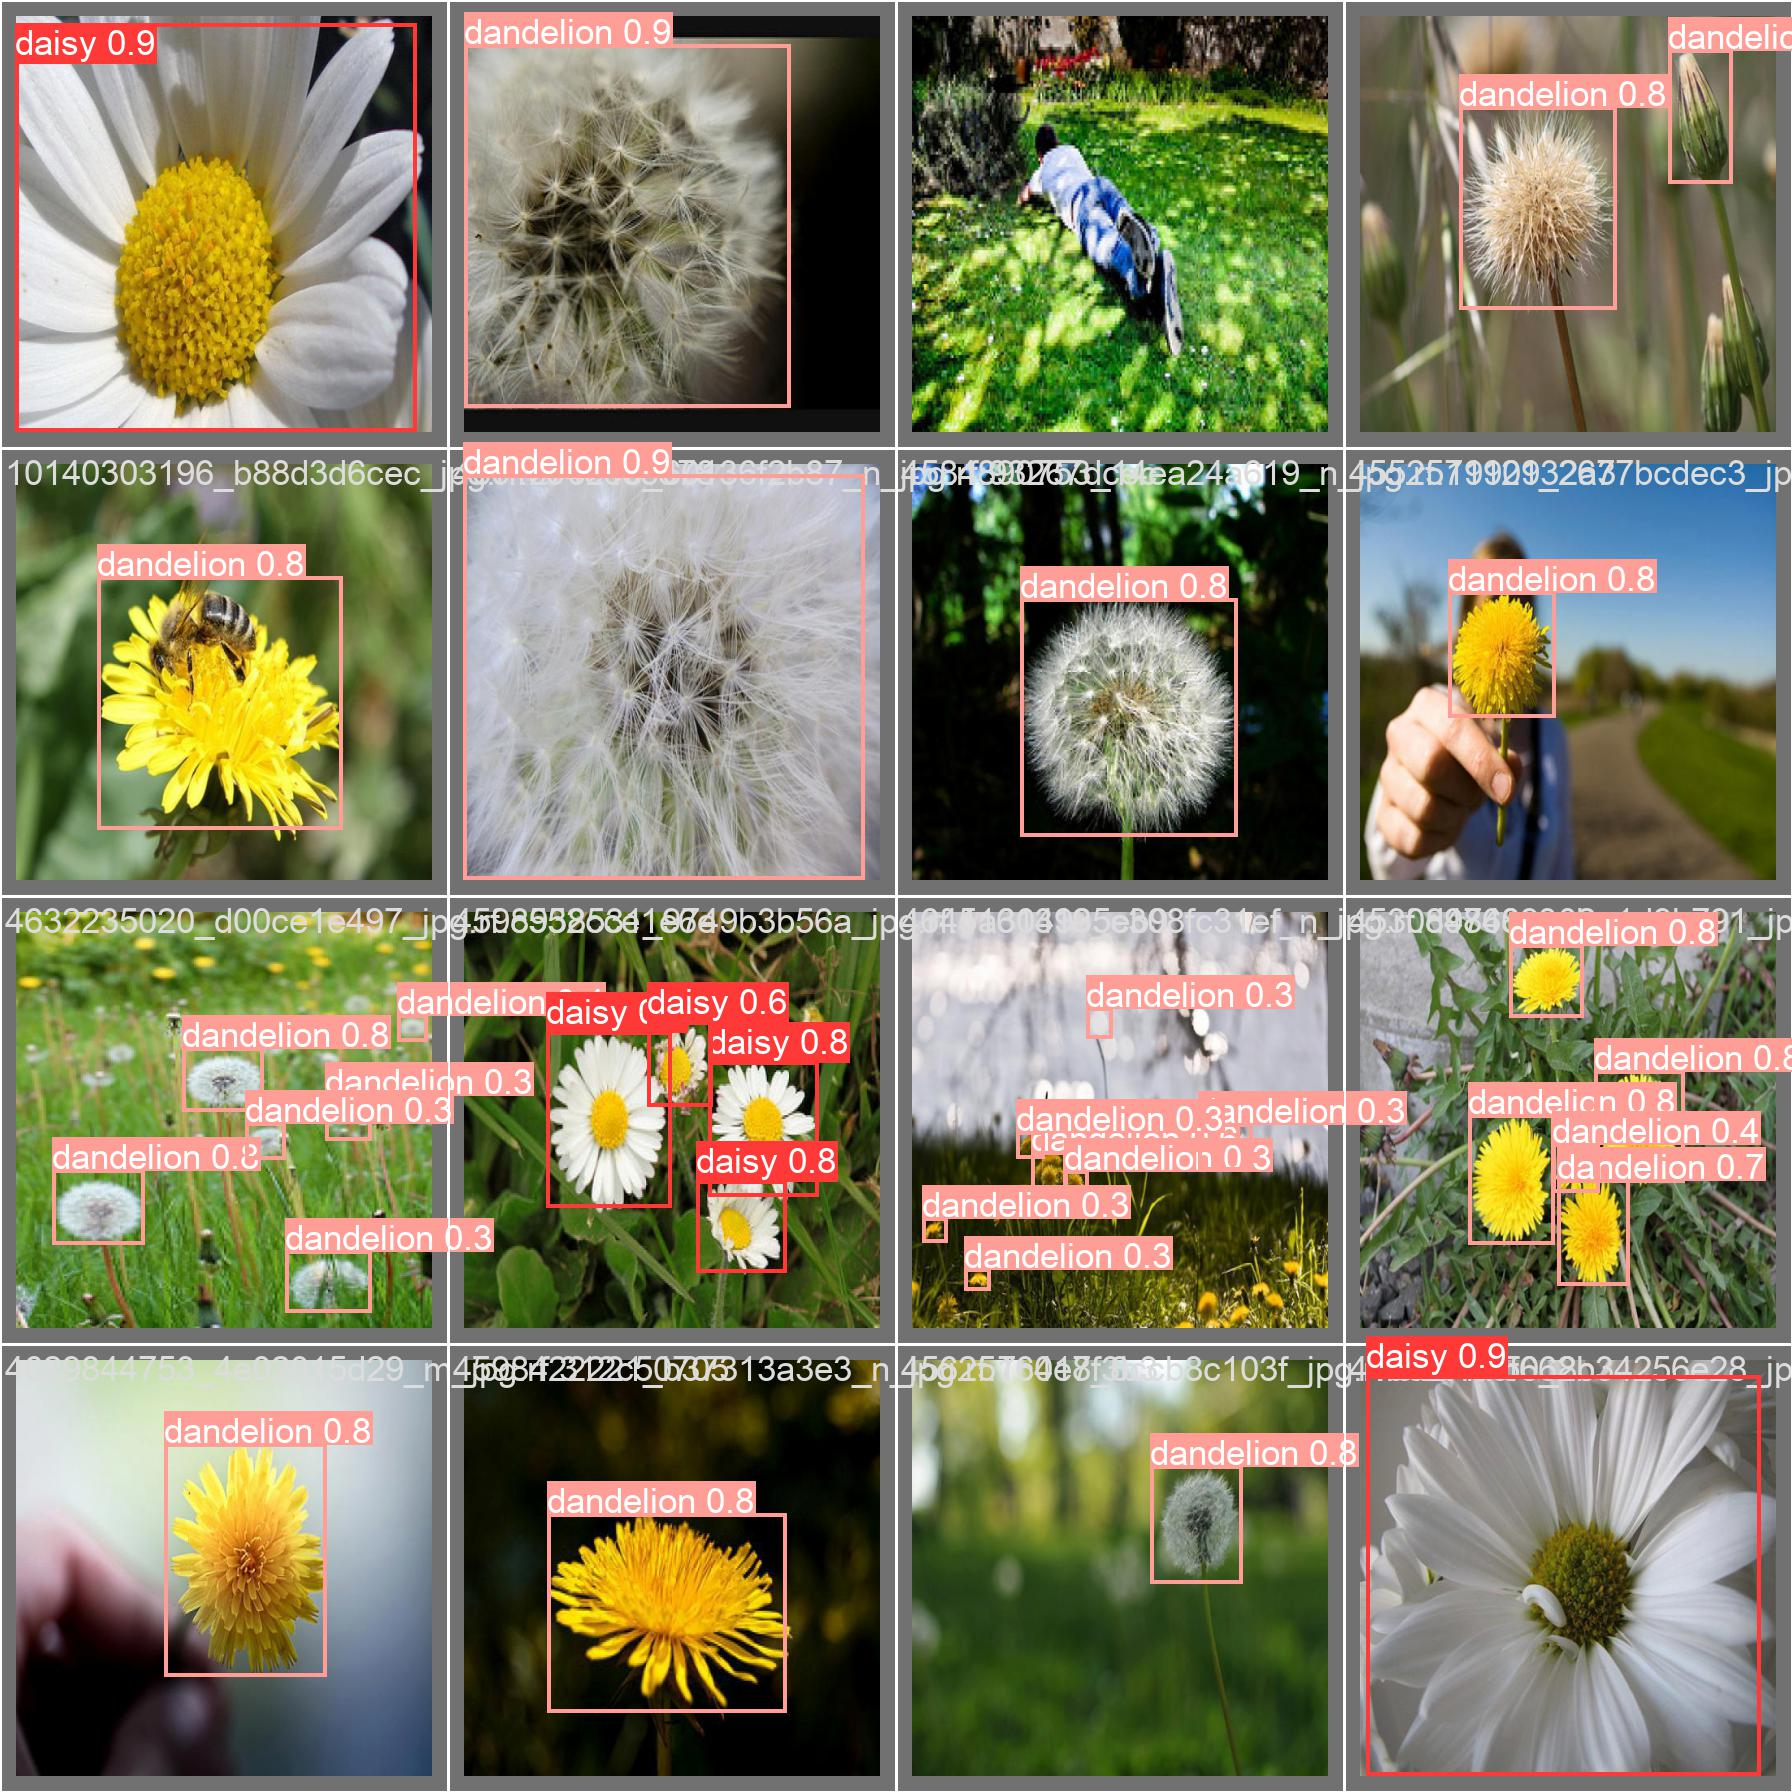

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml   

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Flower-2/valid/labels.cache... 364 images, 1 backgrounds, 0 corrupt: 100% 364/364 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 23/23 [00:07<00:00,  2.96it/s]
                   all        364       1507       0.74      0.589      0.629      0.266
                 daisy        364        940      0.798      0.719      0.761      0.314
             dandelion        364        567      0.682      0.459      0.496      0.218
Speed: 0.7ms pre-process, 9.2ms inference, 0.0ms loss, 2.6ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images/

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/182 /content/datasets/Flower-2/test/images/10466290366_cc72e33532_jpg.rf.ac19b761ae6700962ef26d12b57967ff.jpg: 640x640 5 dandelions, 17.1ms
image 2/182 /content/datasets/Flower-2/test/images/10466558316_a7198b87e2_jpg.rf.ab36de2474bf5b494f32c2f2d32b02d0.jpg: 640x640 3 daisys, 17.1ms
image 3/182 /content/datasets/Flower-2/test/images/11595255065_d9550012fc_jpg.rf.d17af9fd48d5fed18f0da79e2c348a92.jpg: 640x640 1 dandelion, 17.1ms
image 4/182 /content/datasets/Flower-2/test/images/11768468623_9399b5111b_n_jpg.rf.eaf903588e75596538d7ea33c44d6c13.jpg: 640x640 1 dandelion, 17.1ms
image 5/182 /content/datasets/Flower-2/test/images/12193032636_b50ae7db35_n_jpg.rf.8d9cfb3c39ac80304deeee819d21a922.jpg: 640x640 4 daisys, 17.1ms
image 6/182 /content/datasets/Flower-2/test/images/1241011700_261ae180ca_jpg.rf.

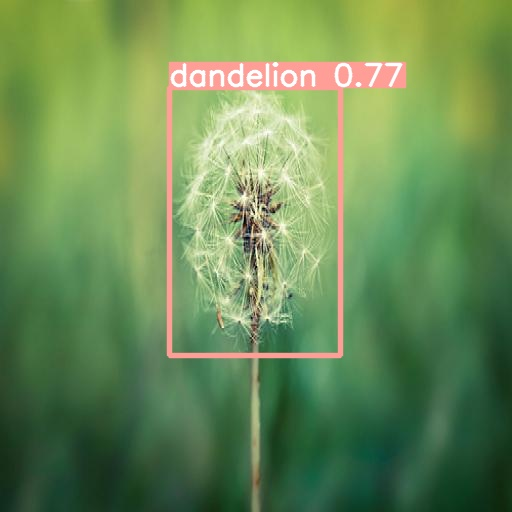

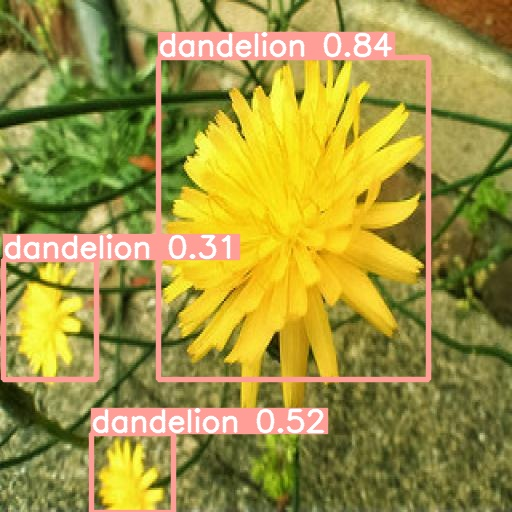

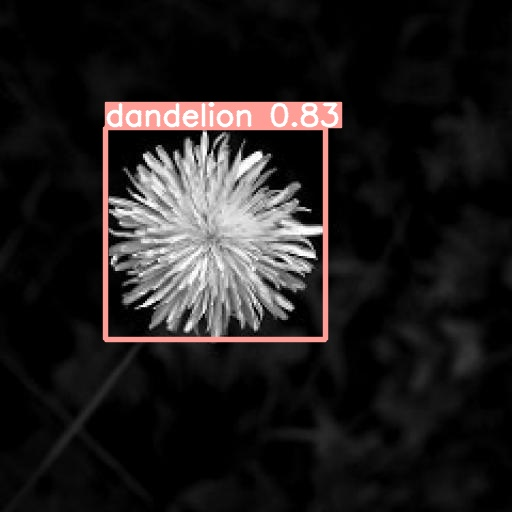

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[22:25]:
      display(Image(filename=image_path, width=600))
      print("\n")